In [8]:
import matplotlib.pyplot as plt
# Remove rare and common tokens.
from gensim.corpora import Dictionary
from topic_modelling_function import extract_documents, pre_processing, find_bigrams, training

In [2]:
docs = list(extract_documents())
len(docs)

1740

In [3]:
docs = pre_processing(docs)
docs = find_bigrams(docs)

3354

In [5]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 8644
Number of documents: 1740


In [6]:
top_topics = training(corpus, dictionary)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.1744.
[([(0.0077886423, 'noise'),
   (0.007627792, 'matrix'),
   (0.005807951, 'component'),
   (0.0055613667, 'gaussian'),
   (0.0050113453, 'kernel'),
   (0.004703597, 'variance'),
   (0.0046837, 'gradient'),
   (0.0043503875, 'prediction'),
   (0.004197604, 'estimate'),
   (0.003976035, 'hidden'),
   (0.0039613624, 'regression'),
   (0.0036042153, 'nonlinear'),
   (0.003576229, 'training_set'),
   (0.0035030742, 'basis'),
   (0.0033668308, 'dimensional'),
   (0.0032747244, 'independent'),
   (0.0032237666, 'approximation'),
   (0.0032053606, 'source'),
   (0.0031023822, 'generalization'),
   (0.0026721354, 'factor')],
  -0.9341742340558141),
 ([(0.02561188, 'cell'),
   (0.021829147, 'neuron'),
   (0.013313527, 'stimulus'),
   (0.013113054, 'response'),
   (0.011572962, 'spike'),
   (0.009339207, 'frequency'),
   (0.00841388, 'synaptic'),
   (0.007922249, 'activity'),
   (0.0076671736, 'signal'),
   (0.007126032, 'firing'),
   (0.0063778018, 'cortex'),
   

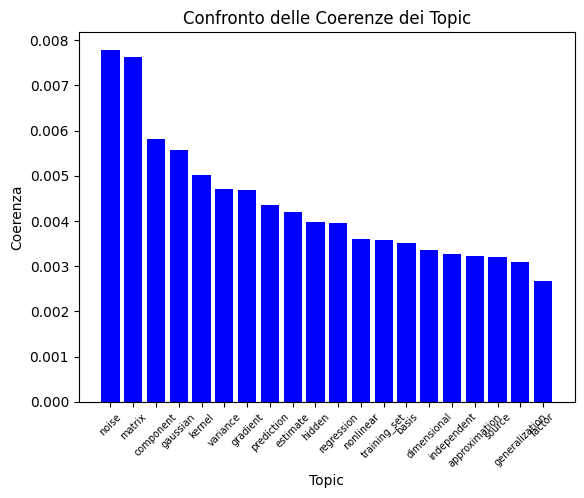

In [20]:
# Creazione del grafico a dispersione
coherence_scores = [topic[0] for topic in top_topics[0][0]]
topics_names = [topic[1] for topic in top_topics[0][0]]
# Creazione del grafico a barre
plt.bar(topics_names, coherence_scores, color='b')

plt.xticks(range(len(topics_names)), topics_names, rotation=45, fontsize=7)
# Aggiunta delle etichette degli assi e del titolo del grafico
plt.xlabel('Topic')
plt.ylabel('Coerenza')
plt.title('Confronto delle Coerenze dei Topic')

# Visualizzazione del grafico
plt.show()
